### Convolutions (6.1 Perspective First)
---
- The response of an LTI (Linear Time Invariant) system to an arbitrary signal is described by the operation called "convolution". Denoted by an asterix (works both ways) $(x * h) = (h * x)$
- The unit sample response $h[n]$ is a complete description of a system, defined as the response to an impulse.
<img src='impulse.png' alt="drawing" width="300"/>
$$\boxed{y(t) = (x * h)[n] =\sum\limits_{k=-\infty}^\infty h[k]x[n-k]}$$
<br>
$$\boxed{y(t) = (h * x)(t) = \int_{-\infty}^{\infty} h(\tau) x(t-\tau) d\tau}$$
<br>

<img src='impulse.png' alt="drawing" width="300"/>

<img src='impulse2.png' alt="drawing" width="350"/>

<img src='impulse3.png' alt="drawing" width="415"/>

<img src='impulse4.png' alt="drawing" width="600"/>

- Convolutions are critical for signal analysis and are yet another bridge between the time domain and frequency domain
- **Time Domain:**
<img src='time_domain.png' alt="drawing" width="600"/>
- **Frequency Domain:**
<img src='frequency_domain.png' alt="drawing" width="630"/>

- The great implication here is that **convolution in the time domain is multiplication in the frequency domain!**
- Thinking back to LIGO, this makes filtering very easy (i.e. just multiply both frequency responses)

- Looking at the definition of convolution you can convince yourself that it's equivalent to flipping (time-reversing) one of the signals and sweeping it across another. 
<img src='convolution.gif' alt="drawing" width="610"/>

<img src='comparison.png' alt="drawing" width="520"/>

### Convolution (Stats Perspective)
- Convolution is a mathematical operation on two functions ($f$ and $g$) that produce a third function ($f * g$) that expresses how the shape of one is modified by the other. 
- The probability distribution of the sum of two or more independent random variables is the convolution of their individual distributions.

Convulutions are a critical component of evey good statistical analysis. Its a way to multiply distributions together. 
Lets build convlutions up by scratch and then go from there. 
$$ Z = X + X' $$
The core concept of a convolution is that you are effectively multiplying distributions. Given two functions $f(x)$ and $g(x)$, we can define convolutions by 
\begin{eqnarray}
(f*g)(z) &=& \int^{\infty}_{-\infty} f(z-t)g(t)dt
\end{eqnarray}
For data analysis, we usually think about this in the context of probability distribuitons $g$ and $f$. From here, we construct a new probability distribution $(f*g)$. Anyway, lets take a look at how it works. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

In [14]:
#First lets define a triangular distribution
def triangle(x,mean=5):
    Norm=mean*mean
    if x <= mean: 
        return max(x,0)/Norm
    if x > mean:
        return max(2*mean-x,0)/Norm
#Now define the gaussian
def gaussian(x,mean=0,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 


In [15]:
#Now lets do a convolution by hand
def convolve(f1,f2,x,iMin=-10,iMax=10,iN=2000):
    step=(iMax-iMin)/iN
    pInt=0
    for i0 in range(iN):
            pX   = i0*step+iMin
            pVal = f1(x-pX)*f2(pX)
            pInt += pVal*step
    return pInt

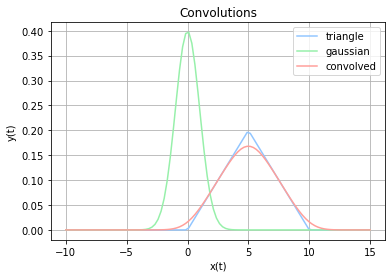

In [16]:
fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
tri_out=np.array(list(map(triangle, x_in)))#triangle(x_in)
gaus_out=np.array(list(map(gaussian, x_in))) #gaussian(x_in)
conv_out=[]
for val in x_in:
    pConv_out=convolve(gaussian,triangle,val)
    conv_out.append(pConv_out)
    
ax.plot(x_in,tri_out,label='triangle')
ax.plot(x_in,gaus_out,label='gaussian')
ax.plot(x_in,conv_out,label='convolved')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

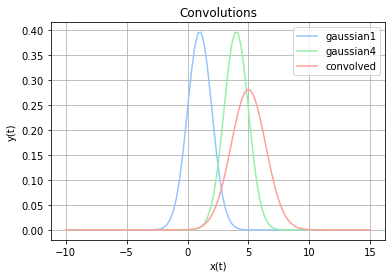

In [17]:
def gaussian1(x,mean=1,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 
def gaussian4(x,mean=4,sigma=1):
    return 1./(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * sigma**2)) 

fig, ax = plt.subplots()
x_in=np.linspace(-10, 15, 100)
gaus1_out=np.array(list(map(gaussian1, x_in)))#triangle(x_in)
gaus4_out=np.array(list(map(gaussian4, x_in))) #gaussian(x_in)
conv_out=[]
for val in x_in:
    pConv_out=convolve(gaussian1,gaussian4,val)
    conv_out.append(pConv_out)
    
ax.plot(x_in,gaus1_out,label='gaussian1')
ax.plot(x_in,gaus4_out,label='gaussian4')
ax.plot(x_in,conv_out,label='convolved')
ax.set(xlabel='x(t)', ylabel='y(t)',title='Convolutions')
ax.grid()
plt.legend()
plt.show()

#### Why are convolutions useful? 
- Cross covariance, Power Spectral Density, Auto-Covariance, Cross-Correlation and the likes are all defined with the backbone of a convolution. 
- Helps visualize probability distributions of summed independent random variables. 
- Like earlier said, it's the basis for filter design (matched filtering, high pass, low pass)
- Gaussian "blurring" or "smearing"
    - Convolutions are useful for "smearing" data or altering the means,variances of gaussians

<img src = "gauss_blur.png">

- Underlying mechanism of the Central Limit Theorem (CTL)
<img src = "ctl1.png" alt="drawing" width="560"/>
<img src = 'ctl2.png' alt="drawing" width="560"/>

- Idea behind "deconvolution/deblurring" filters (Wiener filter for removing noise)
<img src ="deconv.png">

---
### Masks in the Jet Substructure Lab
- Selection in the VQQ notebook is done using "masks"
- Rather than going through each array and picking out the values we want we use masks
- Create a boolean array of 1s and 0s [0,1,1,1,1,0,1,0,1,1,0] based on some selection criteria 
- Broadly ATLAS will have 3 triggers hence, all the trigger data will be composed of 0,1,3 s [0,1,3,3,3,1,0,3,1,3,1,0,3]

In [ ]:
#Selects for all the '1's and '3's jet pT > 320 (Trigger values of 1,3 indicate this Transverse momentum cutoff)
triggerdata1 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 2 > 0)
#Selects for all the '3's only jet pT > 370 (Trigger values of 3 indicate this higher Transverse momentum cutoff)
triggerdata2 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 4 > 1) 

In [ ]:
masks = {}
for key in myDataDict: masks[key] = selection(myDataDict[key])
maskData = selection(dataDict['data'])

-  These selections return arrays of [0,1,0,1] that specify the data points that fit our criteria and the ones that we want to discard.
- The advantage here is that we can apply this mask to several different arrays at once (wqq,zqq,qcd...) instead of running a selection and for looping through all of them

In [ ]:
def histErr(iVar,iLabel,iBins,iMin,iMax,iSims,iMasks,iData=None,iMaskData=None,
            iLabels=None,iColors=None,
            iDensity=True,iStack=False,iWeights=None):

In [ ]:
- iVar #Variable we're looking to plot
- iLabel #Histrogram Title
- iBins # How many bins (divide iMax-iMin into those bins)
- iMin #X axis Min 
- iMax #x axism Max
- iSims # Simulation Data
- iMasks # Simulation Mask
- iData #Data Data
- iMaskData #Data Mask
- iLabels #Labels of each mask (each data set)
- iColors #Colors for each mask
- iDensity #You want normalization with that?
- iStack #Style (filled or not filled bars)
- iWeights #Weights (described earlier in notebook)

In [ ]:
histErr('vjet0_pt','Fat jet $p_T$ [GeV]',50,300,1e3,
        [dataDict['data'],dataDict['data'],dataDict['data']], #the simulation data 3 times
        [alldata,triggerdata1,triggerdata2], #apply 3 different masks onto that simulation data
        iLabels=['all','$p_T$>320','$p_T$>370'],
        iColors=['black','red','blue'],
        iDensity=True,iStack=False,iWeights=None)

In [ ]:
histErr('vjet0_msd0','Fat jet $m_{SD}$ [GeV]',50,40,200,
        myDataDict,masks, #look at all the simulation data (myDataDict) and apply all the masks (masks)
        dataDict['data'],maskData, #look at the data data and apply the mask (maskData)
        iDensity=True,iStack=False,iWeights=True)